<a href="https://colab.research.google.com/github/nidula/Analysing-Crime-Data-LA/blob/main/Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
project_directory = '/content/drive/MyDrive/Analytic Tools/'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Importing the Crime_Data_from_2010_to_2019.csv Dataset

In [4]:
df = pd.read_csv(project_directory+'/Crime_Data_from_2010_to_2019.csv')

In [5]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119792,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2119793,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2119794,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2119795,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [6]:
df.nunique()

DR_NO             2119797
Date Rptd            4497
DATE OCC             3652
TIME OCC             1439
AREA                   21
AREA NAME              21
Rpt Dist No          1303
Part 1-2                2
Crm Cd                142
Crm Cd Desc           142
Mocodes            486164
Vict Age              112
Vict Sex                6
Vict Descent           20
Premis Cd             325
Premis Desc           320
Weapon Used Cd         80
Weapon Desc            79
Status                  9
Status Desc             6
Crm Cd 1              148
Crm Cd 2              143
Crm Cd 3               63
Crm Cd 4               12
LOCATION            75540
Cross Street        12878
LAT                  5437
LON                  5097
dtype: int64

In [7]:
df.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'}, inplace=True)

In [8]:
df.Crm_Cd_Desc.unique()

array(['VIOLATION OF COURT ORDER',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'BOMB SCARE',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY', 'ARSON',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING', 'VEHICLE - STOLEN',
    

In [9]:
df.rename(columns={'DATE OCC': 'DATE_OCC'}, inplace=True)

In [10]:
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])

In [11]:
lowest_date = df['DATE_OCC'].min()
highest_date = df['DATE_OCC'].max()

print(f'Lowest date: {lowest_date}')
print(f'Highest date: {highest_date}')

Lowest date: 2010-01-01 00:00:00
Highest date: 2019-12-31 00:00:00


## Importing the Crime_Data_from_2020_to_Present.csv Dataset

In [12]:
df1 = pd.read_csv(project_directory+'/Crime_Data_from_2020_to_Present.csv')

In [13]:
df1

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682330,230806871,03/03/2023 12:00:00 AM,03/02/2023 12:00:00 AM,620,8,West LA,889,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2000 S HOLT AV,NaN,34.0412,-118.3814
682331,231104474,01/12/2023 12:00:00 AM,01/12/2023 12:00:00 AM,1240,11,Northeast,1107,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,1000 MILWAUKEE AV,NaN,34.1214,-118.1915
682332,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
682333,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054


In [14]:
df1.nunique()

DR_NO             682335
Date Rptd           1168
DATE OCC            1168
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1194
Part 1-2               2
Crm Cd               137
Crm Cd Desc          137
Mocodes           233172
Vict Age             102
Vict Sex               4
Vict Descent          19
Premis Cd            309
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             139
Crm Cd 2             120
Crm Cd 3              35
Crm Cd 4               6
LOCATION           61184
Cross Street        9082
LAT                 5379
LON                 4958
dtype: int64

In [15]:
df1.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'}, inplace=True)

In [16]:
df1.rename(columns={'DATE OCC': 'DATE_OCC'}, inplace=True)

In [17]:
df1['DATE_OCC'] = pd.to_datetime(df1['DATE_OCC'])

In [18]:
lowest_date = df1['DATE_OCC'].min()
highest_date = df1['DATE_OCC'].max()

print(f'Lowest date: {lowest_date}')
print(f'Highest date: {highest_date}')

Lowest date: 2020-01-01 00:00:00
Highest date: 2023-03-13 00:00:00


## Connecting both datasets from 2010 to 2019 and from 2020 to 2023

In [19]:
crime_df = pd.concat([df, df1]).sort_values('DATE_OCC')

In [20]:
crime_df

,DR_NO,Date Rptd,DATE_OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm_Cd_Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
103445,101720395,11/01/2010 12:00:00 AM,2010-01-01,1200,17.0,Devonshire,1727,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,10300 TAMPA AV,NaN,34.2573,-118.5536,NaN
204285,170807798,03/23/2017 12:00:00 AM,2010-01-01,5,8.0,West LA,834,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,10500 KINNARD AV,NaN,34.0583,-118.4282,NaN
204275,171324225,10/02/2017 12:00:00 AM,2010-01-01,1,13.0,Newton,1362,1,121,"RAPE, FORCIBLE",...,Adult Other,121.0,812.0,NaN,NaN,400 E 51ST ST,NaN,33.9966,-118.2674,NaN
204232,101508424,03/13/2010 12:00:00 AM,2010-01-01,1,15.0,N Hollywood,1538,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,5800 TUJUNGA AV,NaN,34.1758,-118.3790,NaN
204229,101504043,01/02/2010 12:00:00 AM,2010-01-01,2000,15.0,N Hollywood,1527,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Adult Other,626.0,NaN,NaN,NaN,TUJUNGA,KITTRIDGE,34.1903,-118.3790,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648513,230207449,03/13/2023 12:00:00 AM,2023-03-13,1530,NaN,Rampart,275,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,1000 S ALVARADO ST,NaN,34.0517,-118.2798,2.0
649962,230906841,03/13/2023 12:00:00 AM,2023-03-13,830,NaN,Van Nuys,932,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,15100 FRIAR ST,NaN,34.1857,-118.4618,9.0
673866,230807120,03/13/2023 12:00:00 AM,2023-03-13,30,NaN,West LA,836,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,SANTA MONICA BL,BEVERLY GLEN,34.0575,-118.4242,8.0
640937,231307674,03/13/2023 12:00:00 AM,2023-03-13,20,NaN,Newton,1342,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,100 E 35TH ST,NaN,34.0179,-118.2731,13.0


In [21]:
min_value = crime_df['TIME OCC'].min()
max_value = crime_df['TIME OCC'].max()
print(min_value)
print(max_value)

1
2359


In [22]:
crime_df['TIME OCC'] = crime_df['TIME OCC'].apply(lambda x: '{:04d}'.format(x))

In [23]:
crime_df

,DR_NO,Date Rptd,DATE_OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm_Cd_Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
103445,101720395,11/01/2010 12:00:00 AM,2010-01-01,1200,17.0,Devonshire,1727,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,10300 TAMPA AV,NaN,34.2573,-118.5536,NaN
204285,170807798,03/23/2017 12:00:00 AM,2010-01-01,0005,8.0,West LA,834,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,10500 KINNARD AV,NaN,34.0583,-118.4282,NaN
204275,171324225,10/02/2017 12:00:00 AM,2010-01-01,0001,13.0,Newton,1362,1,121,"RAPE, FORCIBLE",...,Adult Other,121.0,812.0,NaN,NaN,400 E 51ST ST,NaN,33.9966,-118.2674,NaN
204232,101508424,03/13/2010 12:00:00 AM,2010-01-01,0001,15.0,N Hollywood,1538,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,5800 TUJUNGA AV,NaN,34.1758,-118.3790,NaN
204229,101504043,01/02/2010 12:00:00 AM,2010-01-01,2000,15.0,N Hollywood,1527,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Adult Other,626.0,NaN,NaN,NaN,TUJUNGA,KITTRIDGE,34.1903,-118.3790,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648513,230207449,03/13/2023 12:00:00 AM,2023-03-13,1530,NaN,Rampart,275,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,1000 S ALVARADO ST,NaN,34.0517,-118.2798,2.0
649962,230906841,03/13/2023 12:00:00 AM,2023-03-13,0830,NaN,Van Nuys,932,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,15100 FRIAR ST,NaN,34.1857,-118.4618,9.0
673866,230807120,03/13/2023 12:00:00 AM,2023-03-13,0030,NaN,West LA,836,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,SANTA MONICA BL,BEVERLY GLEN,34.0575,-118.4242,8.0
640937,231307674,03/13/2023 12:00:00 AM,2023-03-13,0020,NaN,Newton,1342,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,100 E 35TH ST,NaN,34.0179,-118.2731,13.0


In [24]:
crime_df.shape

(2802132, 29)

In [25]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802132 entries, 103445 to 679116
Data columns (total 29 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DR_NO           int64         
 1   Date Rptd       object        
 2   DATE_OCC        datetime64[ns]
 3   TIME OCC        object        
 4   AREA            float64       
 5   AREA NAME       object        
 6   Rpt Dist No     int64         
 7   Part 1-2        int64         
 8   Crm Cd          int64         
 9   Crm_Cd_Desc     object        
 10  Mocodes         object        
 11  Vict Age        int64         
 12  Vict Sex        object        
 13  Vict Descent    object        
 14  Premis Cd       float64       
 15  Premis Desc     object        
 16  Weapon Used Cd  float64       
 17  Weapon Desc     object        
 18  Status          object        
 19  Status Desc     object        
 20  Crm Cd 1        float64       
 21  Crm Cd 2        float64       
 22  Crm Cd 3      

## Data Cleaning 

In [26]:
crime_df.isna().sum() # To find the number of null values in each column in the dataset

DR_NO                   0
Date Rptd               0
DATE_OCC                0
TIME OCC                0
AREA               682335
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm_Cd_Desc             0
Mocodes            322034
Vict Age                0
Vict Sex           286112
Vict Descent       286163
Premis Cd              61
Premis Desc           544
Weapon Used Cd    1852618
Weapon Desc       1852619
Status                  3
Status Desc             0
Crm Cd 1               19
Crm Cd 2          2610614
Crm Cd 3          2796874
Crm Cd 4          2801975
LOCATION                0
Cross Street      2335431
LAT                     0
LON                     0
AREA              2119797
dtype: int64

In [27]:
# Dropping the unnecessary columns from the dataset 
crime_df = crime_df.drop(['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3','Crm Cd 4','LAT','LON','Part 1-2','Cross Street','Mocodes','Status','Status Desc','AREA','AREA ','Premis Desc','Premis Cd','Rpt Dist No'], axis=1)

In [28]:
# Finding the remaining column names of the dataset
crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE_OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd',
       'Crm_Cd_Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd',
       'Weapon Desc', 'LOCATION'],
      dtype='object')

### Data cleaning part of Vict Sex

In [29]:
# Find the unique values of the column Vict Sex
crime_df['Vict Sex'].unique()

array(['F', 'M', nan, 'X', 'H', '-', 'N'], dtype=object)

In [30]:
crime_df = crime_df.drop(crime_df[crime_df['Vict Sex'] == 'H'].index)

In [31]:
crime_df = crime_df.drop(crime_df[crime_df['Vict Sex'] == 'N'].index)

In [32]:
crime_df = crime_df.drop(crime_df[crime_df['Vict Sex'] == '-'].index)

In [33]:
crime_df['Vict Sex'].isna().sum()

286103

In [34]:
crime_df.dropna(subset=['Vict Sex'], inplace=True)

In [35]:
crime_df['Vict Sex'].isna().sum()

0

### Data cleaning part of Weapon Used

In [36]:
crime_df['Weapon Used Cd'].fillna(0, inplace=True)

In [37]:
crime_df['Weapon Desc'].fillna('No weapon used', inplace=True)

In [38]:
# Find the unique values of the column Weapon Used Cd
crime_df['Weapon Used Cd'].unique()

array([  0., 400., 306., 122., 500., 511., 304., 212., 102., 302., 218.,
       207., 205., 109., 101., 200., 106., 512., 204., 301., 307., 305.,
       515., 216., 201., 114., 219., 309., 104., 113., 303., 504., 103.,
       107., 112., 111., 501., 308., 514., 214., 215., 115., 211., 206.,
       108., 509., 513., 506., 105., 203., 118., 510., 210., 213., 223.,
       117., 503., 217., 505., 202., 119., 508., 209., 507., 208., 121.,
       502., 300., 110., 220., 222., 221., 311., 310., 312., 125., 116.,
       120., 124., 516., 123.])

In [39]:
crime_df.isna().sum()

DR_NO              0
Date Rptd          0
DATE_OCC           0
TIME OCC           0
AREA NAME          0
Crm Cd             0
Crm_Cd_Desc        0
Vict Age           0
Vict Sex           0
Vict Descent      57
Weapon Used Cd     0
Weapon Desc        0
LOCATION           0
dtype: int64

### Data cleaning part of Vict Descent

In [40]:
crime_df.dropna(subset=['Vict Descent'], inplace=True)

In [41]:
crime_df.isna().sum()

DR_NO             0
Date Rptd         0
DATE_OCC          0
TIME OCC          0
AREA NAME         0
Crm Cd            0
Crm_Cd_Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Weapon Used Cd    0
Weapon Desc       0
LOCATION          0
dtype: int64

In [42]:
crime_df['Vict Descent'].unique()

array(['W', 'H', 'B', 'X', 'A', 'F', 'O', 'K', 'C', 'G', 'I', 'J', 'P',
       'S', 'V', 'Z', 'U', 'D', 'L', '-'], dtype=object)

In [43]:
crime_df = crime_df.drop(crime_df[crime_df['Vict Descent'] == '-'].index)

### Data Cleaning part for Vict Age

In [44]:
crime_df['Vict Age'].unique()

array([ 45,  39,   9,  51,  29,  72,  36,  22,  56,  30,  42,   0,  77,
         5,   7,  11,  20,  35,  76,  97,  68,  26,  21,  15,  54,  40,
        55,  47,  18,  19,  57,  53,  23,  74,  37,  33,  32,  28,  41,
         4,  43,  34,  12,   8,  63,  31,  65,  38,  70,  50,  58,  10,
        25,  46,  49,  17,  48,  -6,   6,  59,  44,  62,  13,  61,  71,
        27,  85,   2,  52,  24,  -9,  81,  69,  60,  14,  86,   3,  84,
        66,  78,  16,  67,  75,  80,  64,  79,  73,  -1,  -4,  92,  -3,
        94,  82,  83,  87,  89,  -2,  91,  93, -11,  99,  96,  90,  88,
        98,  95,  -8, -10,  -7,  -5])

In [45]:
# Check if there are negative values for Vict Age
crime_df_negative_age = crime_df[crime_df['Vict Age'] < 0]
len(crime_df_negative_age)

712

In [46]:
crime_df = crime_df.drop(crime_df[crime_df['Vict Age'] < 0].index)

### Other Data Cleaning processes

#### Checking Duplicates

In [47]:
# Checking if there are duplicated values in the dataset
crime_df.duplicated().sum()

0

#### Date Modification

In [48]:
# assuming that 'crime_df' is the DataFrame containing the 'DATE_OCC' column
crime_df['DATE_OCC'] = pd.to_datetime(crime_df['DATE_OCC'], format='%Y-%m-%d')

# convert the datetime64[ns] column to a string format
crime_df['DATE_OCC_str'] = crime_df['DATE_OCC'].dt.strftime('%Y-%m-%d')

print(crime_df['DATE_OCC_str'])

103445    2010-01-01
204285    2010-01-01
204275    2010-01-01
204232    2010-01-01
204229    2010-01-01
             ...    
680889    2023-03-13
652596    2023-03-13
658335    2023-03-13
646391    2023-03-13
673866    2023-03-13
Name: DATE_OCC_str, Length: 2514730, dtype: object


In [49]:
# assuming that 'df' is the DataFrame with the date column to split
date_col = 'DATE_OCC_str'  # set the name of the date column here

# split the date column into year, month, and day columns
crime_df[['Year', 'Month', 'Day']] = crime_df[date_col].str.split('-', expand=True)

# convert the year, month, and day columns to the desired data type
crime_df['Year'] = pd.to_numeric(crime_df['Year'])
crime_df['Month'] = pd.to_numeric(crime_df['Month'])
crime_df['Day'] = pd.to_numeric(crime_df['Day'])

#### Time Modification

In [50]:
crime_df['TIME OCC'] = crime_df['TIME OCC'].apply(lambda x: x.zfill(4))

In [51]:
min_value = crime_df['TIME OCC'].min()
max_value = crime_df['TIME OCC'].max()
print(min_value)
print(max_value)

0001
2359


In [52]:
def map_time_group(hour):
    if 5 < hour <= 12:
        return 'Morning'
    elif 12 < hour <= 17:
        return 'Afternoon'
    elif 17 < hour <= 21:
        return 'Evening'
    else:
        return 'Night'

In [53]:
crime_df['HOUR'] = crime_df['TIME OCC'].str.slice(start=0, stop=2).astype(int)
crime_df['TIME GROUP'] = crime_df['HOUR'].apply(map_time_group)
crime_df['TIME GROUP']

103445    Morning
204285      Night
204275      Night
204232      Night
204229    Evening
           ...   
680889      Night
652596      Night
658335    Morning
646391      Night
673866      Night
Name: TIME GROUP, Length: 2514730, dtype: object

In [54]:
crime_df

,DR_NO,Date Rptd,DATE_OCC,TIME OCC,AREA NAME,Crm Cd,Crm_Cd_Desc,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,LOCATION,DATE_OCC_str,Year,Month,Day,HOUR,TIME GROUP
103445,101720395,11/01/2010 12:00:00 AM,2010-01-01,1200,Devonshire,354,THEFT OF IDENTITY,45,F,W,0.0,No weapon used,10300 TAMPA AV,2010-01-01,2010,1,1,12,Morning
204285,170807798,03/23/2017 12:00:00 AM,2010-01-01,0005,West LA,354,THEFT OF IDENTITY,39,F,W,0.0,No weapon used,10500 KINNARD AV,2010-01-01,2010,1,1,0,Night
204275,171324225,10/02/2017 12:00:00 AM,2010-01-01,0001,Newton,121,"RAPE, FORCIBLE",9,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400 E 51ST ST,2010-01-01,2010,1,1,0,Night
204232,101508424,03/13/2010 12:00:00 AM,2010-01-01,0001,N Hollywood,354,THEFT OF IDENTITY,51,F,B,0.0,No weapon used,5800 TUJUNGA AV,2010-01-01,2010,1,1,0,Night
204229,101504043,01/02/2010 12:00:00 AM,2010-01-01,2000,N Hollywood,626,INTIMATE PARTNER - SIMPLE ASSAULT,29,M,H,306.0,ROCK/THROWN OBJECT,TUJUNGA,2010-01-01,2010,1,1,20,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680889,232106665,03/13/2023 12:00:00 AM,2023-03-13,0150,Topanga,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",39,M,H,512.0,MACE/PEPPER SPRAY,20900 ROSCOE BL,2023-03-13,2023,3,13,1,Night
652596,230307693,03/13/2023 12:00:00 AM,2023-03-13,0300,Southwest,626,INTIMATE PARTNER - SIMPLE ASSAULT,39,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",4000 W ADAMS BL,2023-03-13,2023,3,13,3,Night
658335,231506990,03/13/2023 12:00:00 AM,2023-03-13,1150,N Hollywood,624,BATTERY - SIMPLE ASSAULT,28,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3900 LANKERSHIM BL,2023-03-13,2023,3,13,11,Morning
646391,231506966,03/13/2023 12:00:00 AM,2023-03-13,0445,N Hollywood,888,TRESPASSING,53,F,H,0.0,No weapon used,6500 RADFORD AV,2023-03-13,2023,3,13,4,Night


In [55]:
crime_df.shape

(2514730, 19)

In [56]:
crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE_OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd',
       'Crm_Cd_Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd',
       'Weapon Desc', 'LOCATION', 'DATE_OCC_str', 'Year', 'Month', 'Day',
       'HOUR', 'TIME GROUP'],
      dtype='object')

## Analysis Questions

### Crime Type Distribution in Los Angeles

In [57]:
unique_crime_codes = crime_df['Crm Cd'].unique()
print(unique_crime_codes)

[354 121 626 341 210 900 812 122 821 813 624 928 230 440 470 649 343 330
 745 310 627 930 860 815 956 237 810 740 805 320 235 760 946 668 753 420
 623 350 933 520 110 442 220 331 761 763 822 820 662 951 850 438 437 886
 236 888 943 940 251 664 439 910 901 625 666 950 660 347 648 410 433 480
 351 421 441 474 755 434 932 922 345 436 231 471 443 661 647 450 670 622
 654 762 949 653 510 920 870 475 954 651 352 756 473 902 845 353 865 840
 880 451 806 890 444 903 942 250 924 944 452 435 446 349 113 472 652 948
 882 453 485 884 487 931 814 921 952 830 445 432 926 906 905 522 904]


In [58]:
count = crime_df['Crm Cd'].value_counts().sort_index().sort_values(ascending=False)
crime_table = pd.DataFrame({'Crime Code': count.index, 'Count': count.values})
print(crime_table)

     Crime Code   Count
0           624  244196
1           330  204947
2           310  189110
3           440  184860
4           354  173394
..          ...     ...
138         904       4
139         472       4
140         926       2
141         905       1
142         453       1

[143 rows x 2 columns]


In [59]:
age_array = crime_table['Crime Code'].to_numpy()
print(age_array)

[624 330 310 440 354 740 626 230 745 210 341 930 420 442 331 888 901 956
 761 946 649 236 900 480 350 220 320 860 662 121 627 812 343 625 664 623
 237 813 903 753 648 520 810 886 668 850 940 110 437 251 815 928 410 910
 820 231 352 951 845 763 647 235 902 441 421 821 762 661 890 755 932 922
 943 122 351 434 510 933 666 660 653 920 522 822 670 250 433 949 805 439
 622 438 806 651 814 654 450 760 443 950 474 954 345 756 921 444 870 471
 652 347 944 435 865 451 353 880 473 485 924 931 942 436 840 475 446 470
 452 884 349 948 830 882 113 445 432 952 906 487 904 472 926 905 453]


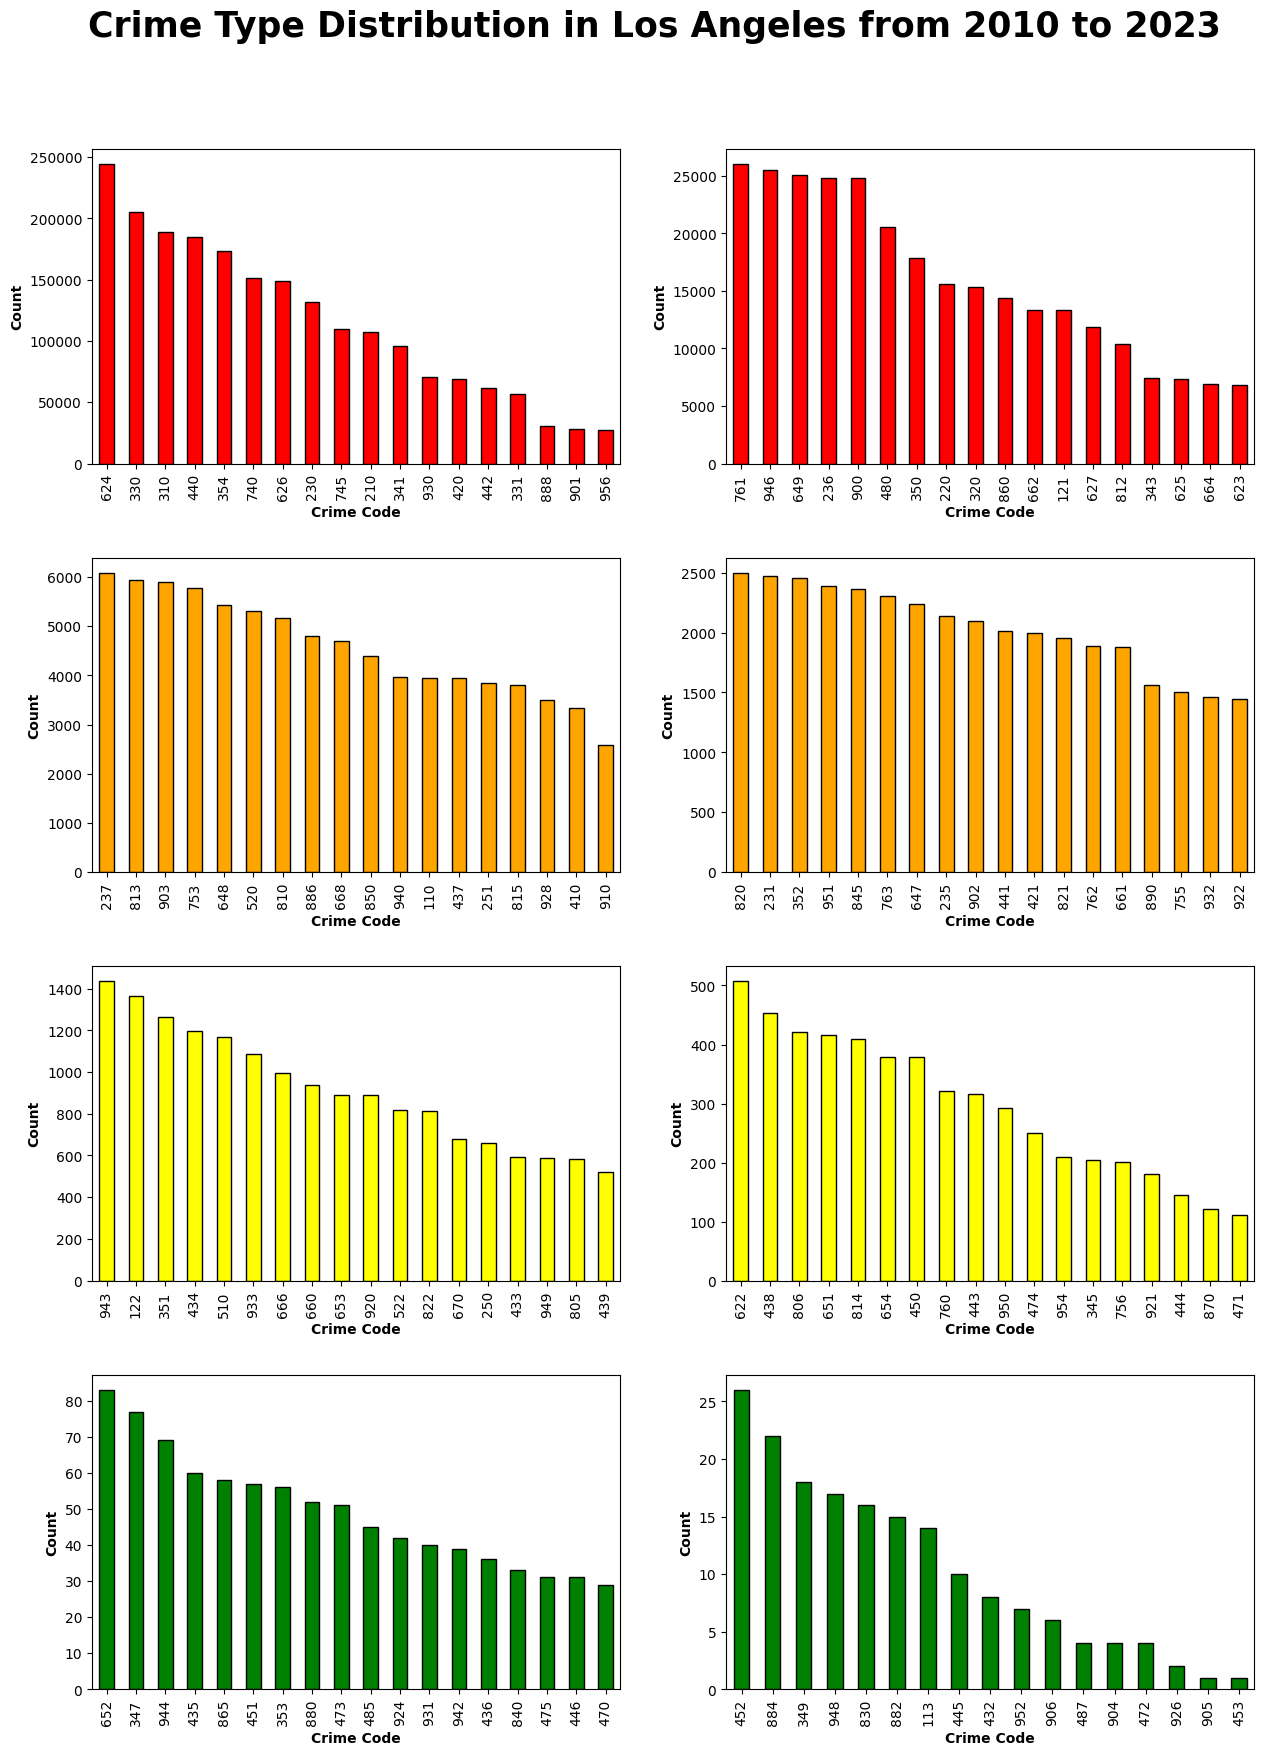

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of occurrences of each value in the 'Crm Cd' column
count = crime_df['Crm Cd'].value_counts()

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

# Filter the data for specific values
specific_data1 = count.loc[[624, 330, 310, 440, 354, 740, 626, 230, 745, 210, 341, 930, 420, 442, 331, 888, 901, 956]]
specific_data2 = count.loc[[761, 946, 649, 236, 900, 480, 350, 220, 320, 860, 662, 121, 627, 812, 343, 625, 664, 623]]
specific_data3 = count.loc[[237, 813, 903, 753, 648, 520, 810, 886, 668, 850, 940, 110, 437, 251, 815, 928, 410, 910]]
specific_data4 = count.loc[[820, 231, 352, 951, 845, 763, 647, 235, 902, 441, 421, 821, 762, 661, 890, 755, 932, 922]]
specific_data5 = count.loc[[943, 122, 351, 434, 510, 933, 666, 660, 653, 920, 522, 822, 670, 250, 433, 949, 805, 439]]
specific_data6 = count.loc[[622, 438, 806, 651, 814, 654, 450, 760, 443, 950, 474, 954, 345, 756, 921, 444, 870, 471]]
specific_data7 = count.loc[[652, 347, 944, 435, 865, 451, 353, 880, 473, 485, 924, 931, 942, 436, 840, 475, 446, 470]]
specific_data8 = count.loc[[452, 884, 349, 948, 830, 882, 113, 445, 432, 952, 906, 487, 904, 472, 926, 905, 453]]

# Create a bar plot for the specific data
specific_data1.plot(kind='bar', color='red', ax=axs[0, 0], edgecolor = 'black')
axs[0, 0].set_ylabel('Count', fontweight='bold')
axs[0, 0].set_xlabel('Crime Code', fontweight='bold')

specific_data2.plot(kind='bar', color='red', ax=axs[0, 1], edgecolor = 'black')
axs[0, 1].set_ylabel('Count', fontweight='bold')
axs[0, 1].set_xlabel('Crime Code', fontweight='bold')

specific_data3.plot(kind='bar', color='orange', ax=axs[1, 0], edgecolor = 'black')
axs[1, 0].set_ylabel('Count', fontweight='bold')
axs[1, 0].set_xlabel('Crime Code', fontweight='bold')

specific_data4.plot(kind='bar', color='orange', ax=axs[1, 1], edgecolor = 'black')
axs[1, 1].set_ylabel('Count', fontweight='bold')
axs[1, 1].set_xlabel('Crime Code', fontweight='bold')

specific_data5.plot(kind='bar', color='yellow', ax=axs[2, 0], edgecolor = 'black')
axs[2, 0].set_ylabel('Count', fontweight='bold')
axs[2, 0].set_xlabel('Crime Code', fontweight='bold')

specific_data6.plot(kind='bar', color='yellow', ax=axs[2, 1], edgecolor = 'black')
axs[2, 1].set_ylabel('Count', fontweight='bold')
axs[2, 1].set_xlabel('Crime Code', fontweight='bold')

specific_data7.plot(kind='bar', color='green', ax=axs[3, 0], edgecolor = 'black')
axs[3, 0].set_ylabel('Count', fontweight='bold')
axs[3, 0].set_xlabel('Crime Code', fontweight='bold')

specific_data8.plot(kind='bar', color='green', ax=axs[3, 1], edgecolor = 'black')
axs[3, 1].set_ylabel('Count', fontweight='bold')
axs[3, 1].set_xlabel('Crime Code', fontweight='bold')

fig.suptitle('Crime Type Distribution in Los Angeles from 2010 to 2023', fontweight='bold', color='black', fontsize=25, y=0.95)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
fig.show()


### The most vulnerable areas in Los Angeles

In [61]:
unique_crime_areas = crime_df['AREA NAME'].unique()
print(unique_crime_areas)

['Devonshire' 'West LA' 'Newton' 'N Hollywood' '77th Street' 'Foothill'
 'Topanga' 'Van Nuys' 'Mission' 'Hollenbeck' 'Southeast' 'Northeast'
 'West Valley' 'Rampart' 'Wilshire' 'Southwest' 'Harbor' 'Central'
 'Olympic' 'Pacific' 'Hollywood']


In [62]:
count = crime_df['AREA NAME'].value_counts().sort_index().sort_values(ascending=False)
area_table = pd.DataFrame({'Area Name': count.index, 'Count': count.values})
print(area_table)

      Area Name   Count
0   77th Street  167299
1     Southwest  157619
2       Central  136386
3   N Hollywood  134413
4       Pacific  134110
5     Southeast  128389
6     Hollywood  126392
7      Van Nuys  117096
8       Olympic  116811
9       Topanga  116141
10    Northeast  114769
11      Mission  114650
12       Newton  114618
13   Devonshire  113018
14      West LA  112769
15     Wilshire  111256
16      Rampart  109080
17  West Valley  107742
18       Harbor  104907
19     Foothill   89614
20   Hollenbeck   87651


In [63]:
area_df = pd.DataFrame(area_table, columns=['Area Name', 'Count'])
area_df = area_df.set_index('Area Name')
area_df

,Count
Area Name,
77th Street,167299
Southwest,157619
Central,136386
N Hollywood,134413
Pacific,134110
Southeast,128389
Hollywood,126392
Van Nuys,117096
Olympic,116811


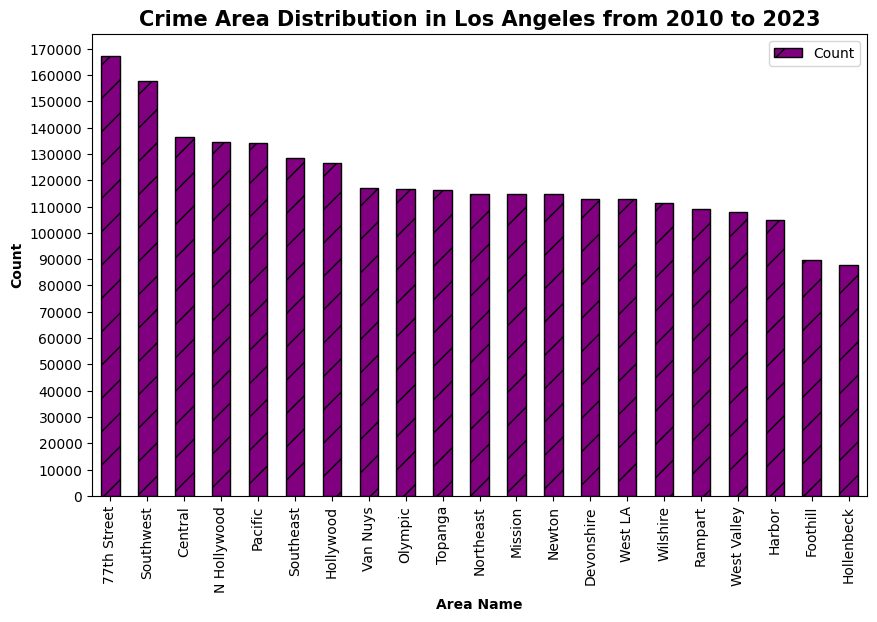

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ar = area_df.plot.bar(figsize=(10,6), edgecolor = 'black', color = 'purple', hatch = '/')
ar.set_ylabel('Count', fontweight='bold')
ar.yaxis.set_major_locator(ticker.MultipleLocator(10000))
ar.set_xlabel('Area Name', fontweight='bold')
ar.set_title('Crime Area Distribution in Los Angeles from 2010 to 2023', fontweight='bold', color='black', fontsize=15)
plt.show()

### Analyze the data of victims of the crimes to know which gender and nationality is targeted the most.

In [65]:
# create the count DataFrame
count = crime_df.groupby(['Vict Descent', 'Vict Sex']).size().reset_index(name='Count')
vict_table = pd.DataFrame(count)

# replace values in Vict Sex column
vict_table['Vict Sex'] = vict_table['Vict Sex'].replace({'F': 'Female', 'M': 'Male', 'X': 'Unknown'})

# replace values in Vict Descent column
vict_table['Vict Descent'] = vict_table['Vict Descent'].replace({'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'F': 'Filipino', 'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian', 'D': 'Cambodian', 'G': 'Guamanian', 'L': 'Laotian'})

# print the updated DataFrame
print(vict_table)


                      Vict Descent Vict Sex   Count
0                      Other Asian   Female   33303
1                      Other Asian     Male   32707
2                      Other Asian  Unknown       9
3                            Black   Female  249023
4                            Black     Male  185295
5                            Black  Unknown     118
6                          Chinese   Female    1742
7                          Chinese     Male    1812
8                          Chinese  Unknown      13
9                        Cambodian   Female      38
10                       Cambodian     Male      33
11                        Filipino   Female    2731
12                        Filipino     Male    2591
13                        Filipino  Unknown       8
14                       Guamanian   Female      76
15                       Guamanian     Male      54
16          Hispanic/Latin/Mexican   Female  474490
17          Hispanic/Latin/Mexican     Male  462591
18          

In [66]:
vict_df = pd.DataFrame(vict_table, columns=['Vict Descent', 'Vict Sex', 'Count'])
vict_df = vict_df.set_index('Vict Descent')
vict_df

,Vict Sex,Count
Vict Descent,,
Other Asian,Female,33303
Other Asian,Male,32707
Other Asian,Unknown,9
Black,Female,249023
Black,Male,185295
Black,Unknown,118
Chinese,Female,1742
Chinese,Male,1812
Chinese,Unknown,13


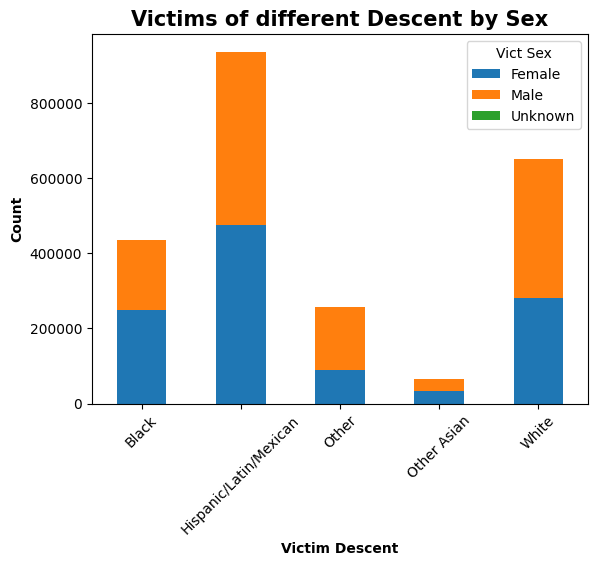

In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# create vict_df dataframe
vict_df = pd.DataFrame(vict_table, columns=['Vict Descent', 'Vict Sex', 'Count'])
vict_df = vict_df.set_index('Vict Descent')

# filter for specific Vict Descent value
specific_descent = ['Other Asian','Black','Hispanic/Latin/Mexican','Other','White']
vict_df_filtered = vict_df.loc[specific_descent]

# plot the filtered dataframe
ax = vict_df_filtered.groupby(['Vict Descent', 'Vict Sex'])['Count'].sum().unstack().plot(kind='bar', stacked=True)

# Customize plot
plt.xlabel('Victim Descent', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count', fontweight='bold')
plt.title('Victims of different Descent by Sex', fontweight='bold', color='black', fontsize=15)

# Show plot
plt.show()

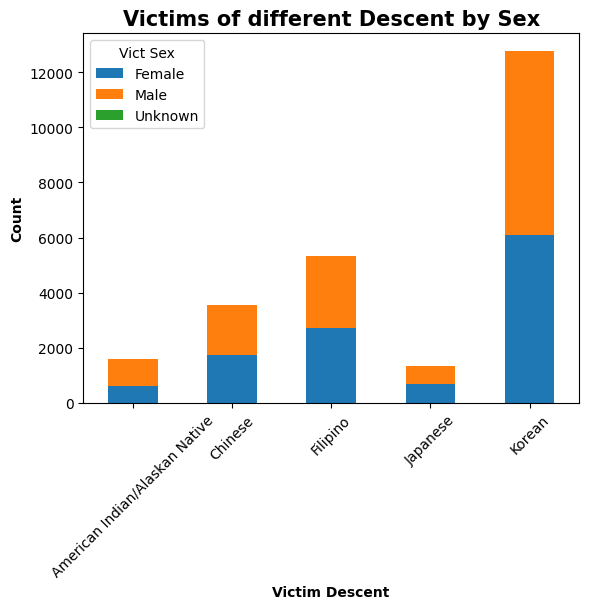

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# create vict_df dataframe
vict_df = pd.DataFrame(vict_table, columns=['Vict Descent', 'Vict Sex', 'Count'])
vict_df = vict_df.set_index('Vict Descent')

# filter for specific Vict Descent value
specific_descent = ['Korean','Filipino','Chinese','American Indian/Alaskan Native','Japanese']
vict_df_filtered = vict_df.loc[specific_descent]

# plot the filtered dataframe
ax = vict_df_filtered.groupby(['Vict Descent', 'Vict Sex'])['Count'].sum().unstack().plot(kind='bar', stacked=True)
    
# Customize plot
plt.xlabel('Victim Descent', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count', fontweight='bold')
plt.title('Victims of different Descent by Sex', fontweight='bold', color='black', fontsize=15)

# Show plot
plt.show()

### Trend of crime activities on victim descent from 2010 to 2022

In [69]:
# Convert 'Year' column to type int
crime_df['Year'] = crime_df['Year'].astype(int)

# Filter data for years 2010 to 2022
crime_df_filtered = crime_df[(crime_df['Year'] >= 2010) & (crime_df['Year'] <= 2022)]

# Group data by year and victim descent
count = crime_df_filtered.groupby(['Year', 'Vict Descent']).size().reset_index(name='Count')
vict_table = pd.DataFrame(count)
print(vict_table)

     Year Vict Descent  Count
0    2010            A   4410
1    2010            B  33909
2    2010            C     81
3    2010            D      4
4    2010            F    272
..    ...          ...    ...
237  2022            U     57
238  2022            V    284
239  2022            W  45805
240  2022            X  21768
241  2022            Z    150

[242 rows x 3 columns]


In [70]:
vict_year_df = pd.DataFrame(vict_table, columns=['Year', 'Vict Descent', 'Count'])
vict_year_df = vict_year_df.set_index('Year')
vict_year_df

,Vict Descent,Count
Year,,
2010,A,4410
2010,B,33909
2010,C,81
2010,D,4
2010,F,272
...,...,...
2022,U,57
2022,V,284
2022,W,45805


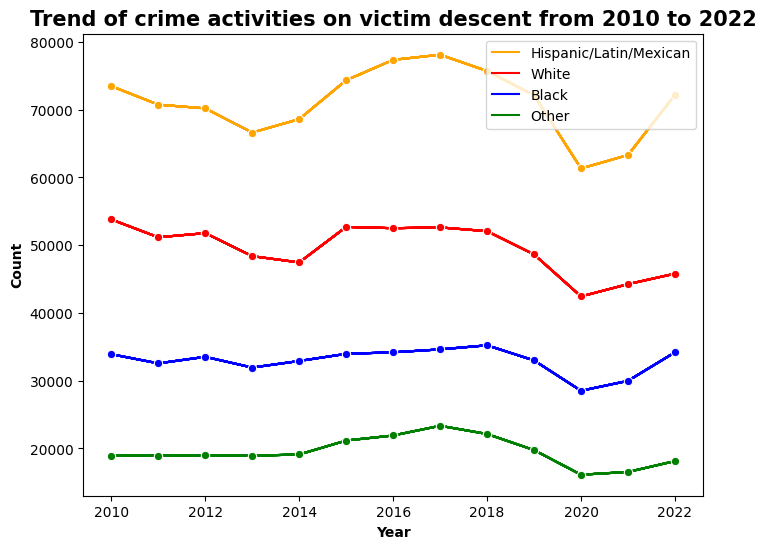

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette and label mappings
color_dict = {'H': 'orange', 'W': 'red', 'B': 'blue', 'O': 'green'}
label_dict = {'H': 'Hispanic/Latin/Mexican', 'W': 'White', 'B': 'Black', 'O': 'Other'}

selected_vars = ['H', 'W', 'B', 'O']
selected_data = vict_year_df[vict_year_df['Vict Descent'].isin(selected_vars)]

# Sort data by count column in descending order
selected_data = selected_data.sort_values(by='Count', ascending=False)

# Set the size of the plot
plt.figure(figsize=(8,6))

# Create plot with color palette
ax = sns.lineplot(data=selected_data, x='Year', y='Count', hue='Vict Descent', hue_order=selected_data['Vict Descent'], palette=color_dict, marker='o')

# Customize plot
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Trend of crime activities on victim descent from 2010 to 2022', fontweight='bold', color='black', fontsize=15)

# Set legend labels
handles, _ = ax.get_legend_handles_labels()
labels = [label_dict[h] for h in _]
ax.legend(handles, labels)

# Show plot
plt.show()

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


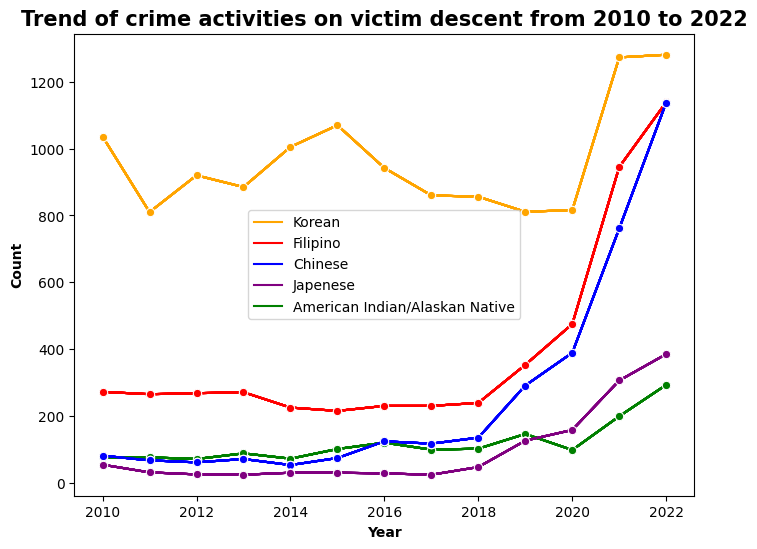

In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette and label mappings
color_dict = {'K': 'orange', 'F': 'red', 'C': 'blue', 'I': 'green', 'J': 'purple'}
label_dict = {'K': 'Korean', 'F': 'Filipino', 'C': 'Chinese', 'I': 'American Indian/Alaskan Native', 'J': 'Japenese'}

selected_vars = ['K', 'F', 'C', 'I', 'J']
selected_data = vict_year_df[vict_year_df['Vict Descent'].isin(selected_vars)]

# Sort data by count column in descending order
selected_data = selected_data.sort_values(by='Count', ascending=False)

# Set the size of the plot
plt.figure(figsize=(8,6))

# Create plot with color palette
ax = sns.lineplot(data=selected_data, x='Year', y='Count', hue='Vict Descent', hue_order=selected_data['Vict Descent'], palette=color_dict, marker='o')

# Customize plot
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Trend of crime activities on victim descent from 2010 to 2022', fontweight='bold', color='black', fontsize=15)

# Set legend labels
handles, _ = ax.get_legend_handles_labels()
labels = [label_dict[h] for h in _]
ax.legend(handles, labels)

# Show plot
plt.show()

### Finding what time of the day has most recorded crimes

In [74]:
# group the crimes by time group and count the occurrences
highest_crime_df = crime_df.groupby('TIME GROUP')['Crm_Cd_Desc'].count()
highest_crime_df

TIME GROUP
Afternoon    641929
Evening      547013
Morning      729028
Night        596760
Name: Crm_Cd_Desc, dtype: int64

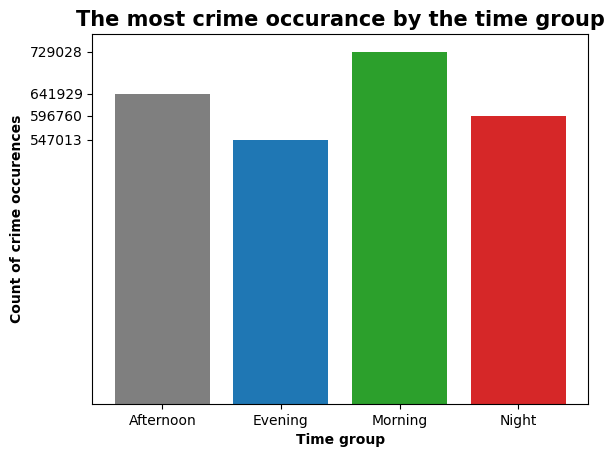

In [75]:
Time_group = ['Afternoon', 'Evening', 'Morning', 'Night']
Count_of_Crime_Occurences = [641929, 547013, 729028, 596760]

fig, ax = plt.subplots()
bar_colors = ['tab:gray', 'tab:blue', 'tab:green', 'tab:red']

ax.bar(Time_group, Count_of_Crime_Occurences, color=bar_colors)
ax.set_xlabel('Time group', fontweight='bold')
ax.set_ylabel('Count of crime occurences', fontweight='bold')
ax.set_title('The most crime occurance by the time group', fontweight='bold', color='black', fontsize=15)
ax.set_yticks(Count_of_Crime_Occurences)

plt.show()

### Yearly & Monthly Trends of the crime rate in the City of Los Angeles from 2010 to 2022

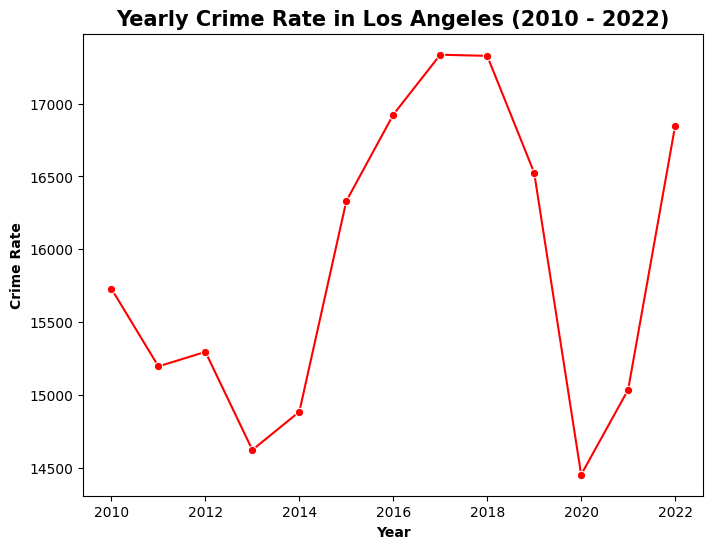

In [76]:
# Analysis of the Yearly Trends of Crime Rate in Los Angeles from 2010-2022
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for years 2010 to 2022
crime_df_filtered = crime_df[(crime_df['Year'] >= 2010) & (crime_df['Year'] <= 2022)]

# Group data by Year and Month and calculate total number of crimes in each group
year_month_groups = crime_df_filtered.groupby(['Year', 'Month'])
crime_counts = year_month_groups.size().reset_index(name='Count')

# Set the size of the plot
plt.figure(figsize=(8,6))

# Create plot
ax = sns.lineplot(data = crime_counts, x='Year', y='Count', marker='o', errorbar = None, color = 'r')

# Customize plot
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Crime Rate', fontweight='bold')
ax.set_title('Yearly Crime Rate in Los Angeles (2010 - 2022)', fontweight='bold', color='black', fontsize=15)

# Show plot
plt.show()

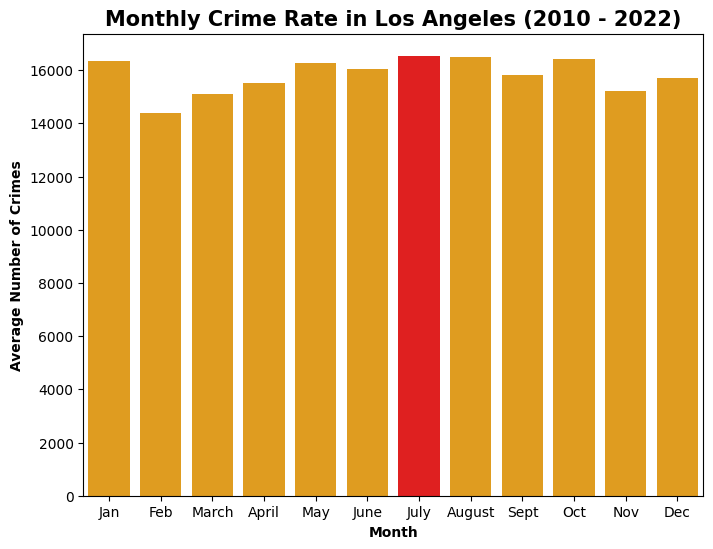

In [77]:
# Analysis of the Monthly Trends of Crime Rate in Los Angeles from 2010-2022
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for years 2010 to 2022
crime_df_filtered = crime_df[(crime_df['Year'] >= 2010) & (crime_df['Year'] <= 2022)]

# Group data by Year and Month and calculate total number of crimes in each group
year_month_groups = crime_df.groupby(['Year', 'Month'])
crime_counts = year_month_groups.size().reset_index(name='Count')

# Calculate mean of each month from 2010 to 2022
monthly_mean_crime = crime_counts.groupby('Month')['Count'].mean()

# Set the size of the plot
plt.figure(figsize = (8, 6))

# Define the color palette of the plot
cols = ['orange' if (x < max(monthly_mean_crime)) else 'red' for x in monthly_mean_crime]

# Create plot
ax = sns.barplot(x = monthly_mean_crime.index, y = monthly_mean_crime.values, palette = cols)

# Customize plot
ax.set_xticklabels(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_title('Monthly Crime Rate in Los Angeles (2010 - 2022)', fontweight = 'bold', color = 'black', fontsize = 15)
ax.set_xlabel('Month', fontweight = 'bold')
ax.set_ylabel('Average Number of Crimes', fontweight = 'bold')

#Show plot
plt.show()

### Which are the 3 main types of weapons used to perform criminal activities in Los Angeles

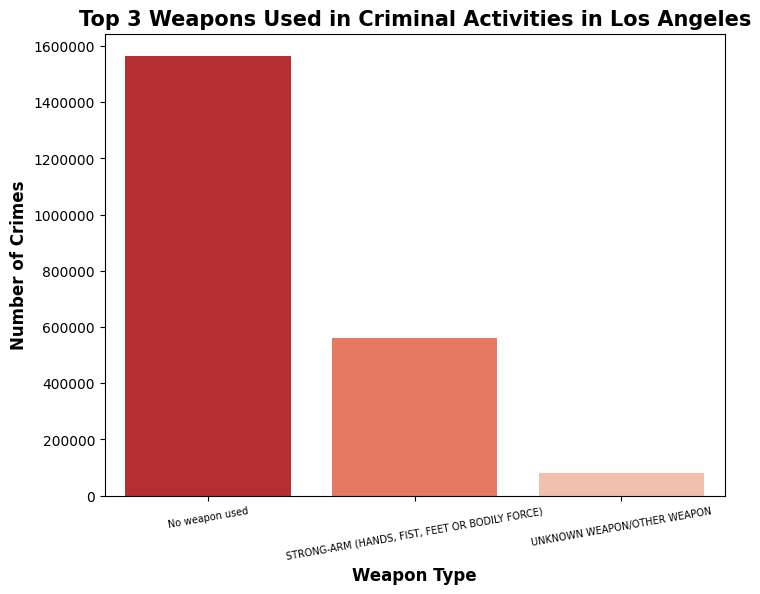

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group weapons using code and filter the top 3 used
weapon_groups = crime_df.groupby(['Weapon Desc'])
weapon_counts = weapon_groups.size().reset_index(name='Count')
top_weapons = weapon_counts.nlargest(3, 'Count')

# Set the size of the plot
plt.figure(figsize = (8, 6))

# Create plot
ax = sns.barplot(x = "Weapon Desc", y = "Count", data = top_weapons, palette = "Reds_r")

# Customize the plot
ax.set_title('Top 3 Weapons Used in Criminal Activities in Los Angeles', fontweight = 'bold', color = 'black', fontsize = 15)
ax.set_xlabel('Weapon Type', fontweight = 'bold', fontsize = 12)
ax.tick_params(axis='x', labelsize = 7)
plt.xticks(rotation=10)
plt.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Number of Crimes', fontweight = 'bold', fontsize = 12)

# Show plot
plt.show()

### Analysis of pre and post covid crime occurence

In [79]:
start_date = pd.to_datetime("01/01/2010", format="%m/%d/%Y")
end_date = pd.to_datetime("12/31/2019", format="%m/%d/%Y")
df = df.loc[df["DATE_OCC"].between(start_date, end_date)]
Pre_Covid_crime_count = df.groupby(pd.Grouper(key='DATE_OCC', freq='M')).size()

In [80]:
start_date = pd.to_datetime("01/01/2020", format="%m/%d/%Y")
end_date = pd.to_datetime("12/31/2022", format="%m/%d/%Y")
df1 = df1.loc[df1["DATE_OCC"].between(start_date, end_date)]
Post_covid_crime_count = df1.groupby(pd.Grouper(key='DATE_OCC', freq='M')).size()

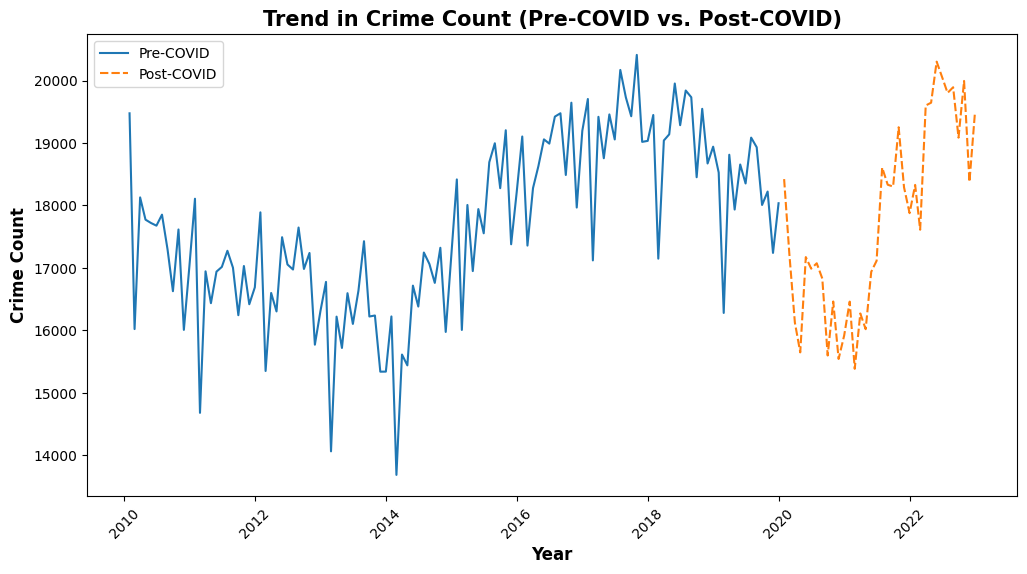

In [81]:
# Combine pre and post covid crime counts into a single dataframe
crime_counts = pd.concat([Pre_Covid_crime_count, Post_covid_crime_count], axis=1)
crime_counts.columns = ['Pre-COVID', 'Post-COVID']

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=crime_counts, ax=ax)
ax.set_xlabel('Year', fontweight = 'bold', fontsize = 12)
ax.set_ylabel('Crime Count', fontweight = 'bold', fontsize = 12)
ax.set_title('Trend in Crime Count (Pre-COVID vs. Post-COVID)', fontweight = 'bold', color = 'black', fontsize = 15)
plt.xticks(rotation=45)

plt.show()